In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader

In [3]:
epochs=20
BATCH_SIZE=128

In [ ]:
train_data =KMNIST(root='./KMNIST_data', train=True, download=True, transform=ToTensor())
test_data =KMNIST(root='./KMNIST_data', train=False, download=True, transform=ToTensor())

e:\miniconda3\envs\py312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


100.0%


Extracting ./data\KMNIST\raw\train-images-idx3-ubyte.gz to ./data\KMNIST\raw



100.0%


Extracting ./data\KMNIST\raw\train-labels-idx1-ubyte.gz to ./data\KMNIST\raw



100.0%


Extracting ./data\KMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\KMNIST\raw



100.0%

Extracting ./data\KMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\KMNIST\raw



In [5]:
train_dl=DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dl=DataLoader(test_data,batch_size=BATCH_SIZE)

In [14]:
def train_iter(epochs,model,train_dl,lr):
    train_hsit=[]
    loss_fn=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(model.parameters(),lr=lr)

    for epoch in range(epochs):
        for data,target in train_dl:
            data=data.view(-1,784)
            output=model(data)
            loss=loss_fn(output,target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"epoch:{epoch},loss:{loss.item()}")
        train_hsit.append(loss.item()) #记录训练损失
    return train_hsit        

In [7]:
def test_acc(test_dl,model):
    correct= 0
    total=0
    with torch.no_grad():
        for data,target in test_dl:
            output = model(data.reshape(-1,784))
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return correct/total*100        
            

In [15]:
models=torch.nn.ModuleList([
    nn.Sequential(
        nn.Linear(784, 512),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ) for _ in range(3)
])

In [23]:
# train_hists = [train_iter(epochs,model,train_dl,lr=lr) for model, lr in zip(models, [0.01,0.001,0.0001])]  #使用多个学习率比较损失函数

trans_datas=[DataLoader(train_data, batch_size=bs, shuffle=True) for bs in [128,256,512]]
train_hists = [train_iter(epochs,model,dl,lr=0.01) for model, dl in zip(models,trans_datas)]

epoch:0,loss:0.18767398595809937
epoch:1,loss:0.221781387925148
epoch:2,loss:0.22972233593463898
epoch:3,loss:0.3546663820743561
epoch:4,loss:0.2793673574924469
epoch:5,loss:0.13940416276454926
epoch:6,loss:0.4902920722961426
epoch:7,loss:0.21329636871814728
epoch:8,loss:0.09215471148490906
epoch:9,loss:0.13447938859462738
epoch:10,loss:0.14473018050193787
epoch:11,loss:0.12491341680288315
epoch:12,loss:0.25853949785232544
epoch:13,loss:0.34091341495513916
epoch:14,loss:0.08529561758041382
epoch:15,loss:0.09644684195518494
epoch:16,loss:0.10466007143259048
epoch:17,loss:0.34542298316955566
epoch:18,loss:0.11458129435777664
epoch:19,loss:0.10687368363142014
epoch:0,loss:0.9499241709709167
epoch:1,loss:0.7012896537780762
epoch:2,loss:0.7345230579376221
epoch:3,loss:0.5661839842796326
epoch:4,loss:0.9119976162910461
epoch:5,loss:0.5919013619422913
epoch:6,loss:0.5142129063606262
epoch:7,loss:0.5326513051986694
epoch:8,loss:0.4681750237941742
epoch:9,loss:0.5302297472953796
epoch:10,loss:0

In [25]:
import matplotlib.pyplot as plt

def draw_tran_hist(hist_list):
    for i,hist in enumerate(hist_list):
        plt.plot(hist,label=f'loss{i}')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Train loss')
    plt.show()

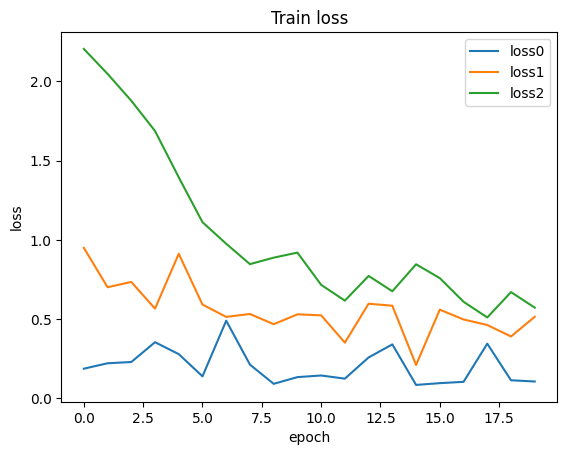

In [26]:
draw_tran_hist(train_hists)